I am testing the SMA crossover by creating a visualisation here. This file is redundant to the functionality of the bot.

In [ ]:
import ccxt
import pandas as pd

# Getting BTC data 
exchange = ccxt.binance()
ohlcv = exchange.fetch_ohlcv('BTC/USDT', '1h', limit=50)

# Converting to DataFrame
df = pd.DataFrame(ohlcv, columns=['timestamp','open','high','low','close','volume'])

# Calculating SMAs
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA30'] = df['close'].rolling(30).mean()

# Generating signals (1 = Buy/Long, -1 = Sell/Short, 0 = No Action)
df['Signal'] = 0
df.loc[df['SMA10'] > df['SMA30'], 'Signal'] = 1
df.loc[df['SMA10'] < df['SMA30'], 'Signal'] = -1

# Printing last 5 rows to check data looks correct
print(df.tail())



        timestamp       open       high        low      close     volume  \
45  1754276400000  114797.90  114799.00  114527.73  114570.61  242.02073   
46  1754280000000  114570.61  114653.51  114345.74  114383.55  269.38623   
47  1754283600000  114383.54  114418.75  114188.00  114391.26  265.57526   
48  1754287200000  114391.26  114482.49  114148.58  114423.76  331.16254   
49  1754290800000  114423.77  114546.02  114402.45  114508.01  113.84837   

         SMA10          SMA30  Signal  
45  114502.680  113896.313333       1  
46  114502.995  113947.027000       1  
47  114510.802  114008.524000       1  
48  114510.801  114057.448000       1  
49  114518.055  114104.115333       1  


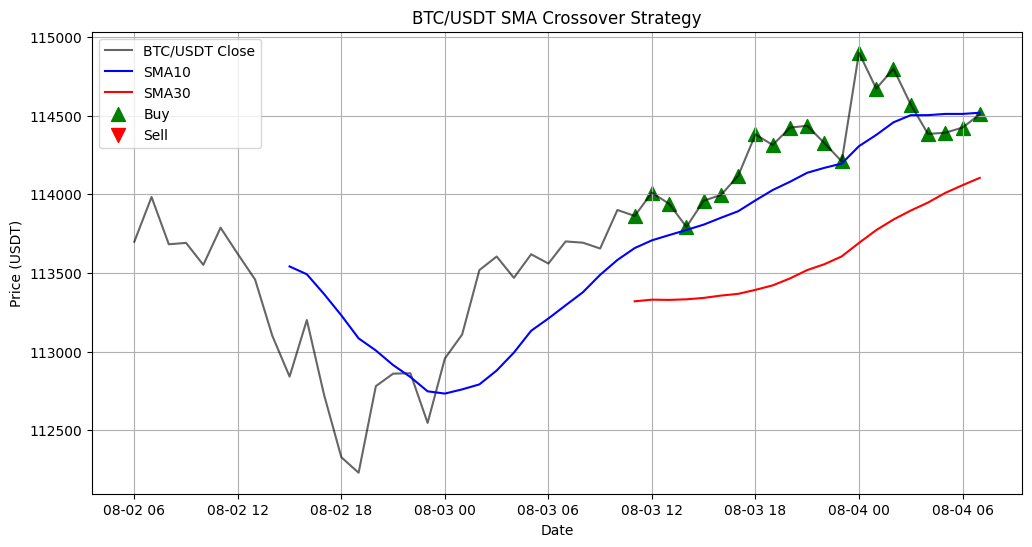

In [ ]:
import matplotlib.pyplot as plt

# Converting timestamp to human-readable dates
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')

plt.figure(figsize=(12,6))

# Plotting closing prices
plt.plot(df['date'], df['close'], label='BTC/USDT Close', color='black', alpha=0.6)

# Ploting SMA lines
plt.plot(df['date'], df['SMA10'], label='SMA10', color='blue')
plt.plot(df['date'], df['SMA30'], label='SMA30', color='red')

# Marking Buy/Long (green) and Sell/Short (red)
plt.scatter(df['date'][df['Signal'] == 1], df['close'][df['Signal'] == 1], label='Buy', marker='^', color='green', s=100)
plt.scatter(df['date'][df['Signal'] == -1], df['close'][df['Signal'] == -1], label='Sell', marker='v', color='red', s=100)

plt.title('BTC/USDT SMA Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()


The SMA crossover strategy takes the rolling mean of the last 10/30h candles and determines a buy signal for when the 10h SMA is trending above the 30h SMA and a sell signal for when the 10h SMA is trending below the 30h SMA. The intersection of these lines can be perceived as buy and sell signals.